In [1]:
import pandas as pd
import numpy as np


data = pd.read_excel(r"Lab Session Data.xlsx", sheet_name="Purchase data")

A = data.loc[:, ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = data[['Payment (Rs)']].values


print(f"A = {A}")
print(f"C = {C}")


dim = A.shape[1]
num_vectors = A.shape[0]
rank_A = np.linalg.matrix_rank(A)
A_pinv = np.linalg.pinv(A)
cost_vector = A_pinv @ C


print(f"The dimensionality of the vector space is = {dim}")
print(f"The number of vectors in the vector space is = {num_vectors}")
print(f"The rank of the matrix A is = {rank_A}")
print(f"The pseudo-inverse of matrix A is =\n{A_pinv}")
print(f"The cost of each product that is available for sale is = {cost_vector.flatten()}")

A = [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
C = [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
The dimensionality of the vector space is = 3
The number of vectors in the vector space is = 10
The rank of the matrix A is = 3
The pseudo-inverse of matrix A is =
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
The cost of each product that is available for sale is = [ 1. 55. 18.]


In [5]:
import pandas as pd
import numpy as np


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="Purchase data")


data = data.iloc[:, :5].drop(columns=["Customer"])
data.columns = ["Candies", "Mangoes", "Milk_Packets", "Payment"]


X = np.column_stack((np.ones(len(data)), data[["Candies", "Mangoes", "Milk_Packets"]].values))
Y = data["Payment"].values

X_pinv = np.linalg.pinv(X)
model_parameters = X_pinv @ Y


print("Estimated Model Parameters (Intercept and Coefficients):")
print(model_parameters)

Estimated Model Parameters (Intercept and Coefficients):
[9.9475983e-14 1.0000000e+00 5.5000000e+01 1.8000000e+01]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="Purchase data")


data["Customer Type"] = ["RICH" if amount > 200 else "POOR" for amount in data["Payment (Rs)"]]

features = data[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]]
target = data["Customer Type"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


predictions = knn_model.predict(X_test)


print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

        POOR       0.00      0.00      0.00         2
        RICH       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

D = 0      2081.85
1      2077.75
2      2068.85
3      2072.95
4      2078.25
        ...   
244    1397.40
245    1400.75
246    1405.10
247    1412.35
248    1363.05
Name: Price, Length: 249, dtype: float64
The mean of column D is = 1560.663453815261
The variance of column D is = 58732.365352539186
The sample mean for all Wednesdays in the dataset is = 1550.7060000000001
The sample mean for April in the dataset is = 1698.9526315789474
The probability of making a loss in the stock is 0.4979919678714859
The probability of making a profit in the stock on Wednesday is 0.42
The conditional probability of making a profit, given that today is Wednesday = 1.0


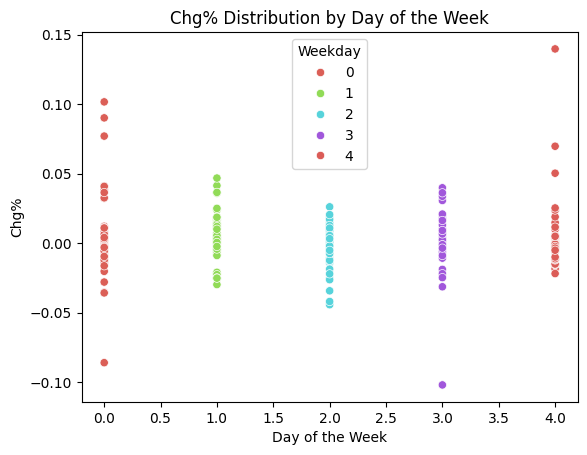

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, variance


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")


price_column = data["Price"]
print(f"D = {price_column}")

price_mean = mean(price_column)
price_variance = variance(price_column)
print(f"The mean of column D is = {price_mean}")
print(f"The variance of column D is = {price_variance}")


data["Date"] = pd.to_datetime(data["Date"])
data["Weekday"] = data["Date"].dt.weekday

wednesday_prices = data[data["Weekday"] == 2]["Price"]
wednesday_mean = wednesday_prices.mean()
print(f"The sample mean for all Wednesdays in the dataset is = {wednesday_mean}")

data["Month"] = data["Date"].dt.month
april_prices = data[data["Month"] == 4]["Price"]
april_mean = mean(april_prices)
print(f"The sample mean for April in the dataset is = {april_mean}")


loss_probability = (data["Chg%"] < 0).mean()
print(f"The probability of making a loss in the stock is {loss_probability}")


profit_wednesdays = (data.loc[data["Weekday"] == 2, "Chg%"] > 0).mean()
print(f"The probability of making a profit in the stock on Wednesday is {profit_wednesdays}")


num_wed = len(wednesday_prices)
num_profitable_wed = (wednesday_prices > 0).sum()
conditional_prob_wed = num_profitable_wed / num_wed
print(f"The conditional probability of making a profit, given that today is Wednesday = {conditional_prob_wed}")

sns.scatterplot(x="Weekday", y="Chg%", data=data, hue="Weekday", palette="hls")
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Chg% Distribution by Day of the Week")
plt.show()

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

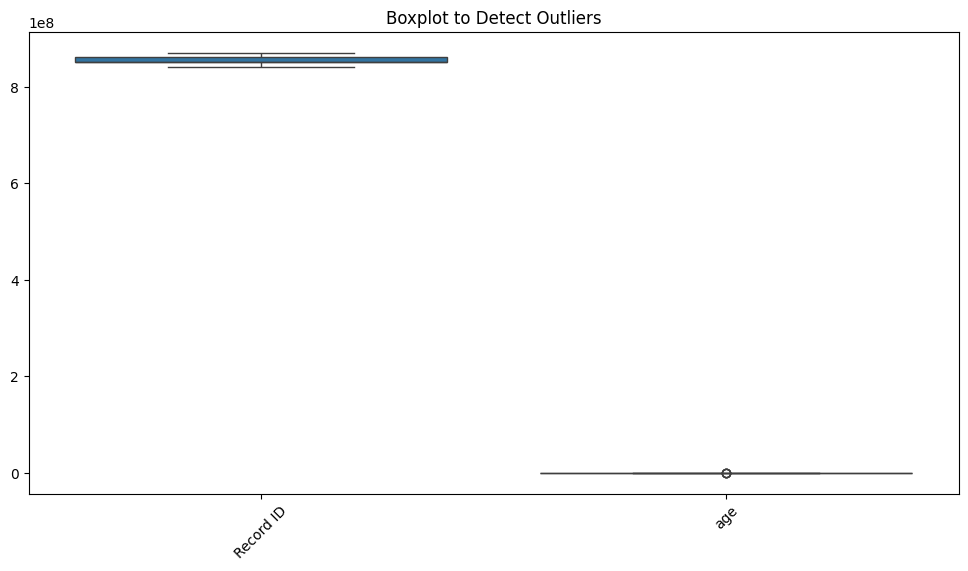


Mean of Numeric Variables:
 Record ID    8.529473e+08
age          7.355582e+01
dtype: float64

Standard Deviation of Numeric Variables:
 Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

print(data.head())

print("\nData Types of Each Column:\n", data.dtypes)


categorical_columns = data.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:\n", categorical_columns)

numerical_columns = data.select_dtypes(include=["number"]).columns
print("\nRange of Numeric Variables:\n", data[numerical_columns].agg(['min', 'max']))

missing_counts = data.isnull().sum()
print("\nMissing Values in Each Attribute:\n", missing_counts)


plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()


numeric_means = data[numerical_columns].mean()
numeric_stddevs = data[numerical_columns].std()

print("\nMean of Numeric Variables:\n", numeric_means)
print("\nStandard Deviation of Numeric Variables:\n", numeric_stddevs)


Missing Values Before Imputation:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dty

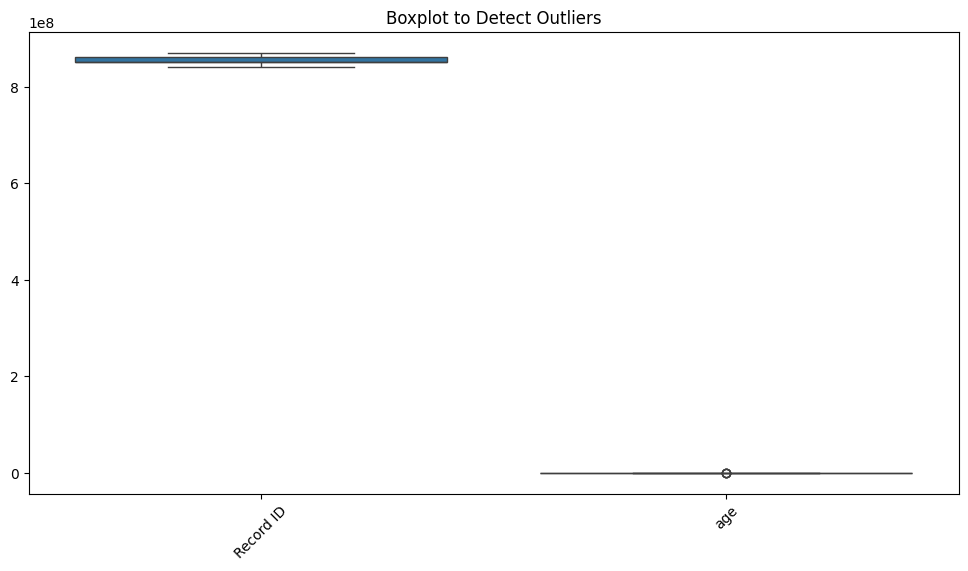


Missing Values After Numeric Imputation:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

print("\nMissing Values Before Imputation:\n", data.isnull().sum())

numeric_columns = data.select_dtypes(include=["number"]).columns
categorical_columns = data.select_dtypes(include=["object"]).columns

print("\nNumeric Columns:", numeric_columns)
print("\nCategorical Columns:", categorical_columns)


plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()

data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.median() if x.skew() > 1 else x.mean()))


print("\nMissing Values After Numeric Imputation:\n", data.isnull().sum())

data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


print("\nMissing Values After Categorical Imputation:\n", data.isnull().sum())

data.to_excel("Imputed_Thyroid_Data.xlsx", index=False)
print("Data imputation complete. File saved as 'Imputed_Thyroid_Data.xlsx'")

<Figure size 1200x600 with 0 Axes>

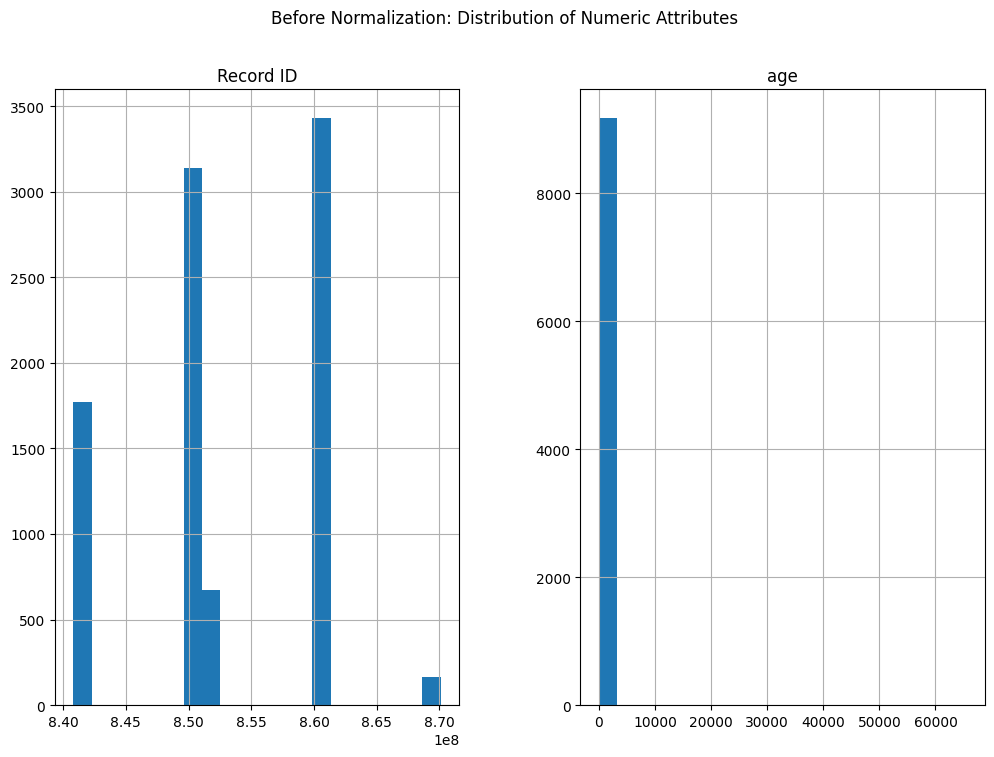


Normalization Completed!


<Figure size 1200x600 with 0 Axes>

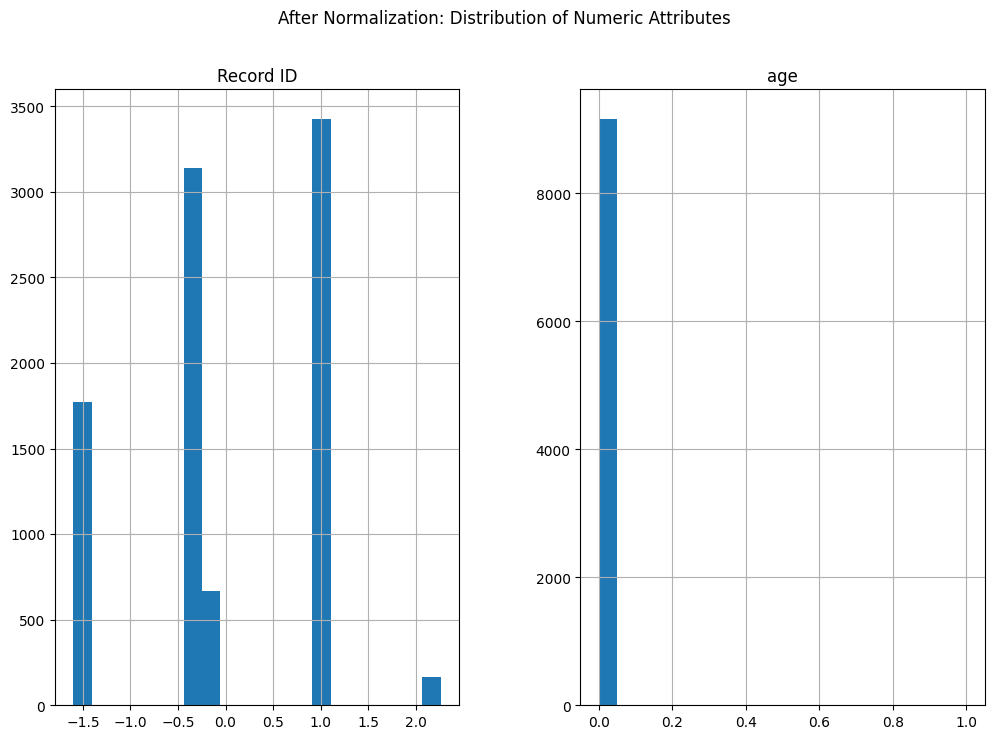

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")


numeric_columns = data.select_dtypes(include=["number"]).columns


plt.figure(figsize=(12, 6))
data[numeric_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle("Before Normalization: Distribution of Numeric Attributes")
plt.show()

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

normalized_data = data.copy()

for col in numeric_columns:
    if abs(data[col].skew()) < 1:  # Low skewness → Standard Scaling
        normalized_data[col] = standard_scaler.fit_transform(data[[col]])
    else:  # High skewness → Min-Max Scaling
        normalized_data[col] = minmax_scaler.fit_transform(data[[col]])

print("\nNormalization Completed!")


plt.figure(figsize=(12, 6))
normalized_data[numeric_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle("After Normalization: Distribution of Numeric Attributes")
plt.show()

In [9]:
import pandas as pd
import numpy as np


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")


binary_vectors = data.iloc[:2]


binary_columns = [
    col for col in data.columns
    if set(data[col].dropna().unique()).issubset({0, 1})
]


binary_data = binary_vectors[binary_columns]


vec1, vec2 = binary_data.iloc[0].values, binary_data.iloc[1].values

both_ones = np.sum((vec1 == 1) & (vec2 == 1))
both_zeros = np.sum((vec1 == 0) & (vec2 == 0))
mismatch_10 = np.sum((vec1 == 1) & (vec2 == 0))
mismatch_01 = np.sum((vec1 == 0) & (vec2 == 1))

total_elements = both_ones + both_zeros + mismatch_10 + mismatch_01


jaccard_coefficient = both_ones / (both_ones + mismatch_10 + mismatch_01) if (both_ones + mismatch_10 + mismatch_01) != 0 else 0
simple_matching_coefficient = (both_ones + both_zeros) / total_elements if total_elements != 0 else 0


print("\nBinary Attributes Considered:", binary_columns)
print("\nJaccard Coefficient:", round(jaccard_coefficient, 4))
print("Simple Matching Coefficient:", round(simple_matching_coefficient, 4))

if jaccard_coefficient < simple_matching_coefficient:
    print("\n SMC is higher than JC as it considers both 1-1 and 0-0 matches.")
    print(" JC is useful when we only care about feature presence (1s).")
else:
    print("\n JC and SMC values are close, indicating feature vector similarity.")


Binary Attributes Considered: []

Jaccard Coefficient: 0
Simple Matching Coefficient: 0

 JC and SMC values are close, indicating feature vector similarity.


In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")


numeric_columns = data.select_dtypes(include=["number"]).columns
numeric_vectors = data.loc[:1, numeric_columns]


vec1, vec2 = numeric_vectors.iloc[0].values.reshape(1, -1), numeric_vectors.iloc[1].values.reshape(1, -1)

cosine_sim = cosine_similarity(vec1, vec2)[0][0]

print("\nCosine Similarity between the first two observations:", round(cosine_sim, 4))


if cosine_sim > 0.8:
    print(" The vectors are highly similar.")
elif cosine_sim > 0.5:
    print(" The vectors have moderate similarity.")
else:
    print(" The vectors are not very similar.")


Cosine Similarity between the first two observations: 1.0
 The vectors are highly similar.


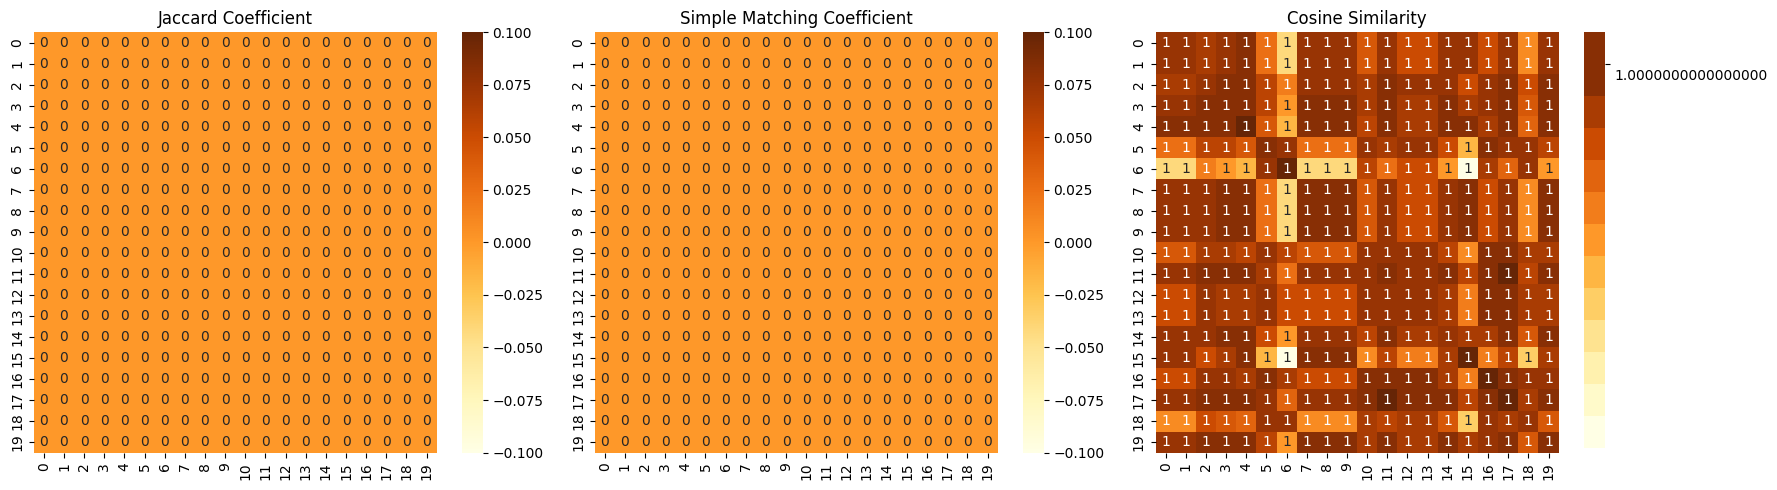

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


file_path = r"Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")


subset_data = data.iloc[:20]


binary_columns = [
    col for col in data.columns
    if set(data[col].dropna().unique()).issubset({0, 1})
    and pd.api.types.is_numeric_dtype(data[col])
]


binary_matrix = subset_data[binary_columns].to_numpy()
numeric_matrix = subset_data.select_dtypes(include=["number"]).to_numpy()


def compute_similarity_matrices(matrix):
    n = matrix.shape[0]
    jaccard_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            both_one = np.sum((matrix[i] == 1) & (matrix[j] == 1))
            both_zero = np.sum((matrix[i] == 0) & (matrix[j] == 0))
            mismatch_10 = np.sum((matrix[i] == 1) & (matrix[j] == 0))
            mismatch_01 = np.sum((matrix[i] == 0) & (matrix[j] == 1))
            
            jaccard_matrix[i, j] = both_one / (both_one + mismatch_10 + mismatch_01) if (both_one + mismatch_10 + mismatch_01) != 0 else 0
            smc_matrix[i, j] = (both_one + both_zero) / (both_one + both_zero + mismatch_10 + mismatch_01) if (both_one + both_zero + mismatch_10 + mismatch_01) != 0 else 0
    
    return jaccard_matrix, smc_matrix

jc_matrix, smc_matrix = compute_similarity_matrices(binary_matrix)
cos_matrix = cosine_similarity(numeric_matrix)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(jc_matrix, annot=True, cmap="YlOrBr", ax=axes[0])
axes[0].set_title("Jaccard Coefficient")

sns.heatmap(smc_matrix, annot=True, cmap="YlOrBr", ax=axes[1])
axes[1].set_title("Simple Matching Coefficient")

sns.heatmap(cos_matrix, annot=True, cmap="YlOrBr", ax=axes[2])
axes[2].set_title("Cosine Similarity")

plt.tight_layout()
plt.show()